**Teams** **paper**

In [ ]:
import pandas as pd

# Fix the file path issue by using a raw string
data = pd.read_csv('/content/duplicates data - Sheet1.csv')

# Use the correct variable name 'data'
dataclean = data.drop_duplicates()

# Use the correct variable name 'dataclean' for saving
dataclean.to_csv('cleaned_file.csv', index=False)

print("Clean data")

Clean data


In [ ]:
import pandas as pd

# Load the cleaned data from the generated file
cleaned_df = pd.read_csv('cleaned_file.csv')

# Display the cleaned data
display(cleaned_df)

,Unnamed: 0,Source,Target,Type
0,NaN,GATA-2,GATA-2,Activates
1,NaN,GATA-1,GATA-1,Activates
2,NaN,GATA-2,PU.1,Inhibits
3,NaN,PU.1,GATA-2,Inhibits
4,NaN,GATA-2,GATA-1,Activates
...,...,...,...,...
65,NaN,PU.1,Lyl1,Activates
66,NaN,GATA-2,Lyl1,Activates
67,NaN,PU.1,Elf1,Inhibits
68,NaN,GATA-2,GATA-2,Activates


In [ ]:
# prompt: For the same file as the previous code, write a code to detect any conflicts i.e if A inhibits B in one instance and A activates B in another

def check_conflicts(interactions):
    """
    Checks for conflicting interactions (e.g., A activates B and A inhibits B)
    in a list of interaction tuples (source, target, type).
    """
    conflicts = []
    interaction_dict = {}

    for source, target, interaction_type in interactions:
        pair = (source, target)
        if pair not in interaction_dict:
            interaction_dict[pair] = {interaction_type}
        else:
            interaction_dict[pair].add(interaction_type)

    for pair, types in interaction_dict.items():
        if "Activates" in types and "Inhibits" in types:
            conflicts.append(f"Conflict detected: {pair[0]} activates and inhibits {pair[1]}")
        if "activates" in types and "inhibits" in types:
            conflicts.append(f"Conflict detected: {pair[0]} activates and inhibits {pair[1]} (case-insensitive)")

    return conflicts

# Re-define the 'edges' list from the code provided
edges_from_graph_drawing = [
    ("GATA-2", "GATA-2", "Activates"),
    ("GATA-1", "GATA-1", "Activates"),
    ("GATA-2", "PU.1", "Inhibits"),
    ("PU.1", "GATA-2", "Inhibits"),
    ("GATA-2", "GATA-1", "Activates"),
    ("GATA-1", "EKLF", "Activates"),
    ("GATA-1", "Fli-1", "Activates"),
    ("Fli-1", "EKLF", "Inhibits"),
    ("EKLF", "Fli-1", "Inhibits"),
    ("PU.1", "cJun", "Activates"),
    ("cJun", "EgrNab", "Activates"),
    ("EgrNab", "Gfi-1", "Inhibits"),
    ("Gfi-1", "EgrNab", "Inhibits"),
    ("C/EBPα", "Gfi-1", "Activates"),
    ("PU.1", "C/EBPα", "Activates"),
    ("C/EBPα", "PU.1", "Activates"),
    ("PU.1", "SCL", "Inhibits"),
    ("SCL", "GATA-1", "Activates")
]

# Re-define the 'interactions' list from the subsequent code blocks
interactions_list1 = [
    ("Thrombopoietin", "vWF+ HSC", "Activates"),
    ("SCF", "HSC", "Activates"),
    ("CXCL12", "HSC", "Activates"),
    ("Notch", "HSC", "Activates"),
    ("Angiopoietin", "HSC", "Activates"),
    ("M-CSF", "HSC", "Activates"),
    ("IFN-γ", "HSC", "Activates"),
    ("TNF-α", "HSC", "Inhibits"),
    ("PU.1", "Myeloid Genes", "Activates"),
    ("GATA-1", "Erythroid/Megakaryocyte Genes", "Activates"),
    ("Egr1", "Monocyte Genes", "Activates"),
    ("Aged Niche", "HSC", "Inhibits")
]

interactions_list2 = [
    ("Gata2", "Scl", "activates"),
    ("Fli1", "Gata2", "activates"),
    ("Scl", "Fli1", "activates"),
    ("Bmp4", "Fli1", "activates"),
    ("Bmp4", "Gata2", "activates"),
    ("Notch1", "Gata2", "activates"),
    ("Hedgehog/VEGF", "Notch1", "activates"),
    ("Gata1", "Gata2", "inhibits"),
    ("Gata1", "Scl", "activates"),
    ("Scl", "Runx1", "activates"),
    ("ATF3", "IL6", "inhibits"),
    ("ATF3", "IL12b", "inhibits"),
    ("ATF3", "NF-kB", "cooperates"),
    ("ATF3", "AP1", "cooperates"),
    ("PU.1", "Csf1r", "maintains"),
    ("Pax5", "Csf1r", "represses"),
    ("Oct4", "miRNA genes", "activates"),
    ("Sox2", "miRNA genes", "activates"),
    ("Nanog", "miRNA genes", "activates"),
    ("miRNAs", "Target genes", "represses"),
    ("MYC", "Multiple genes", "activates"),
]

interactions_list3 = [
    ("GATA1", "Erythroid genes", "Activates"),
    ("GATA1", "PU.1", "Inhibits"),
    ("PU.1", "Myeloid genes", "Activates"),
    ("PU.1", "GATA1", "Inhibits"),
    ("GFI1", "IRF8", "Inhibits"),
    ("IRF8", "GFI1", "Inhibits"),
    ("GATA1", "GATA1", "Activates"),
    ("PU.1", "PU.1", "Activates"),
    ("GATA2", "TAL1", "Activates"),
    ("TAL1", "FLI1", "Activates"),
    ("FLI1", "GATA2", "Activates"),
    ("Upstream TF", "Target TF", "Activates"),
    ("MPP2/MPP3", "GMP", "Expands"),
    ("Inflammation", "MPP2/MPP3", "Activates"),
    ("CDK6", "Quiescence", "Inhibits"),
    ("MYC", "Protein Synthesis", "Activates"),
    ("p57/p27", "HSC Quiescence", "Maintains"),
    ("Retinoic Acid", "HSC Dormancy", "Maintains"),
    ("RUNX1", "Chromatin", "Activates"),
    ("Cytokines", "Lineage TFs", "Instructs"),
    ("HSPCs", "Megakaryocyte lineage", "Differentiates"),
    ("Leukemia mutations", "Stem-like state", "Alters"),
    ("BCR-ABL", "Differentiation Program", "Disrupts")
]

interactions_list4 = [
    ("Elf1", "+19 Scl enhancer", "Activates"),
    ("Fli1", "+19 Scl enhancer", "Activates"),
    ("Gata2", "+19 Scl enhancer", "Activates"),
    ("GATA factors", "+40 Scl enhancer", "Activates"),
    ("Scl/Tal1", "Lmo2", "Cofactor"),
    ("Gata1/2", "Lmo2", "Cofactor"),
    ("Ldb1", "Lmo2", "Cofactor"),
    ("E2A", "Lmo2", "Cofactor"),
    ("Scl", "Gfi1 enhancer", "Activates"),
    ("Gata2", "Gfi1 enhancer", "Activates"),
    ("Pu.1", "Gfi1 enhancer", "Activates"),
    ("Erg", "Gfi1 enhancer", "Activates"),
    ("Meis1", "Gfi1 enhancer", "Activates"),
    ("Runx1", "Gfi1 enhancer", "Activates"),
    ("Gata2", "Runx1 enhancer", "Activates"),
    ("Fli1", "Runx1 enhancer", "Activates"),
    ("Elf1", "Runx1 enhancer", "Activates"),
    ("Scl", "Runx1 enhancer", "Activates"),
    ("Lmo2", "Runx1 enhancer", "Activates"),
    ("Ldb1", "Runx1 enhancer", "Activates"),
    ("Fli1", "Lyl1 promoter", "Activates"),
    ("Elf1", "Lyl1 promoter", "Activates"),
    ("Erg", "Lyl1 promoter", "Activates"),
    ("Pu.1", "Lyl1 promoter", "Activates"),
    ("Gata2", "Lyl1 promoter", "Activates"),
    ("PU.1", "Elf1 promoter", "Inhibits"),
    ("Ets/GATA", "Scl", "Motif-binding"),
    ("Ets/GATA", "Fli1", "Motif-binding"),
    ("Ets/GATA", "Gata2", "Motif-binding"),
    ("Ets/GATA", "Hhex", "Motif-binding"),
    ("Ets/GATA", "Smad6", "Motif-binding"),
    ("Scl", "Gfi1 -35 kb", "Co-binding"),
    ("Lmo2", "Gfi1 -35 kb", "Co-binding"),
    ("Lyl1", "Gfi1 -35 kb", "Co-binding"),
    ("Runx1", "+23 kb Runx1 enhancer", "Autoregulates")
]


# Check for conflicts in the different interaction lists
print("Checking for conflicts in the graph drawing edges:")
conflicts1 = check_conflicts(edges_from_graph_drawing)
if conflicts1:
    for conflict in conflicts1:
        print(conflict)
else:
    print("No conflicts found in the graph drawing edges.")

print("\nChecking for conflicts in interactions_list1:")
conflicts2 = check_conflicts(interactions_list1)
if conflicts2:
    for conflict in conflicts2:
        print(conflict)
else:
    print("No conflicts found in interactions_list1.")

print("\nChecking for conflicts in interactions_list2:")
conflicts3 = check_conflicts(interactions_list2)
if conflicts3:
    for conflict in conflicts3:
        print(conflict)
else:
    print("No conflicts found in interactions_list2.")

print("\nChecking for conflicts in interactions_list3:")
conflicts4 = check_conflicts(interactions_list3)
if conflicts4:
    for conflict in conflicts4:
        print(conflict)
else:
    print("No conflicts found in interactions_list3.")

print("\nChecking for conflicts in interactions_list4:")
conflicts5 = check_conflicts(interactions_list4)
if conflicts5:
    for conflict in conflicts5:
        print(conflict)
else:
    print("No conflicts found in interactions_list4.")


Checking for conflicts in the graph drawing edges:
No conflicts found in the graph drawing edges.

Checking for conflicts in interactions_list1:
No conflicts found in interactions_list1.

Checking for conflicts in interactions_list2:
No conflicts found in interactions_list2.

Checking for conflicts in interactions_list3:
No conflicts found in interactions_list3.

Checking for conflicts in interactions_list4:
No conflicts found in interactions_list4.


In [ ]:

dataclean = data.drop_duplicates()

display(dataclean)
dataclean.to_csv('cleaned_file.csv', index=False)

,Unnamed: 0,Source,Target,Type
0,NaN,GATA-2,GATA-2,Activates
1,NaN,GATA-1,GATA-1,Activates
2,NaN,GATA-2,PU.1,Inhibits
3,NaN,PU.1,GATA-2,Inhibits
4,NaN,GATA-2,GATA-1,Activates
...,...,...,...,...
66,NaN,PU.1,Lyl1,Activates
67,NaN,GATA-2,Lyl1,Activates
68,NaN,PU.1,Elf1,Inhibits
70,NaN,GATA-2,GATA-2,Activates


In [ ]:
import pandas as pd

parameter_path = r"/content/parameters.dat"

parameter_df = pd.read_csv(parameter_path, sep="\t", comment="#")

print("RACIPE Parameters:")
print(parameter_df.to_string())

#column 1: 100 models
#column 2: number of steady states in each model
#column 3 onwards in prs (notepad) (for each model)
#trd: threshold
#act and inh: fold change (activation and inhibition)
#num: hill's coefficient


RACIPE Parameters:
      1   4  305.936220  26.732281   1.706107  88.031279  758.582098  67.617246  21.597931  8613.851442  51.956595  519.306121  27.778392  71.976838  62.476538  23.801712  24.618030  99.729331  28.053717  68.006036  87.342219  42.032413  82.842538  88.739058  82.580619  62.829120  10.417781  46.045639   95.167780  51.168146  43.359474  21.283060  21.125654  306.468428  0.830016  0.819090  0.198215  0.403464  0.923952  0.520082  0.629707  0.322926  0.678480  0.510412  0.113198  0.308487  0.789956  0.850595  0.935347  0.830578  0.861124  0.443115  0.906682  0.818262  0.224782  0.811179  0.391508  0.209764  0.690642  0.441061  0.593772  0.441963  0.963633  0.503561  0.505400  0.328521  0.741246  2.000000  78.007461  1.434240  4.000000  0.024076  1.666158  3.000000  97.191463    3.118252  1.000000  87.208502   7.312716  4.000000.1  51.869403  1.368986  5.000000  0.023077  1.836721  2.000000.1  82.120227  0.444866  1.000000.1  41.110396  0.452939  3.000000.1  64.294557  1

In [ ]:


parameter_path = r"/content/parameters.dat"

parameter_df = pd.read_csv(parameter_path, sep="\t", comment="#")

# Display the DataFrame without the index
print("RACIPE Parameters:")
print(parameter_df.to_string(index=False))



RACIPE Parameters:
  1  4  305.936220  26.732281  1.706107  88.031279  758.582098  67.617246  21.597931  8613.851442  51.956595  519.306121  27.778392  71.976838  62.476538  23.801712  24.618030  99.729331  28.053717  68.006036  87.342219  42.032413  82.842538  88.739058  82.580619  62.829120  10.417781  46.045639  95.167780  51.168146  43.359474  21.283060  21.125654  306.468428  0.830016  0.819090  0.198215  0.403464  0.923952  0.520082  0.629707  0.322926  0.678480  0.510412  0.113198  0.308487  0.789956  0.850595  0.935347  0.830578  0.861124  0.443115  0.906682  0.818262  0.224782  0.811179  0.391508  0.209764  0.690642  0.441061  0.593772  0.441963  0.963633  0.503561  0.505400  0.328521  0.741246  2.000000  78.007461  1.434240  4.000000  0.024076  1.666158  3.000000  97.191463   3.118252  1.000000  87.208502  7.312716  4.000000.1  51.869403  1.368986  5.000000  0.023077  1.836721  2.000000.1  82.120227  0.444866  1.000000.1  41.110396  0.452939  3.000000.1  64.294557  1.350658  

In [ ]:

parameter_df.to_csv('racipe_parameters.csv', index=False)

print("\nRACIPE parameters saved to 'racipe_parameters.csv'.")



RACIPE parameters saved to 'racipe_parameters.csv'.


In [ ]:

with open("/content/headingiees.txt", 'r') as f:
  reader = [line.strip().split() for line in f] # Splitting by default whitespace

# Display the list of lists (reader)
reader


[['Model'],
 ['Steady_States'],
 ['Prod_of_GATA2'],
 ['Prod_of_GATA1'],
 ['Prod_of_PU1'],
 ['Prod_of_EKLF'],
 ['Prod_of_Fli1'],
 ['Prod_of_cJun'],
 ['Prod_of_EgrNab'],
 ['Prod_of_Gfi1'],
 ['Prod_of_CEBPα'],
 ['Prod_of_SCL'],
 ['Prod_of_Bmp4'],
 ['Prod_of_Notch1'],
 ['Prod_of_VEGF'],
 ['Prod_of_Hedgehog'],
 ['Prod_of_Runx1'],
 ['Prod_of_ATF3'],
 ['Prod_of_IL6'],
 ['Prod_of_IL12b'],
 ['Prod_of_NF-kB'],
 ['Prod_of_AP1'],
 ['Prod_of_Csf1r'],
 ['Prod_of_Pax5'],
 ['Prod_of_GFI1'],
 ['Prod_of_IRF8'],
 ['Prod_of_TAL1'],
 ['Prod_of_Elf1'],
 ['Prod_of_LMO2'],
 ['Prod_of_Ldb1'],
 ['Prod_of_E2A'],
 ['Prod_of_Meis1'],
 ['Prod_of_Erg'],
 ['Prod_of_Lyl1'],
 ['Deg_of_GATA2'],
 ['Deg_of_GATA1'],
 ['Deg_of_PU1'],
 ['Deg_of_EKLF'],
 ['Deg_of_Fli1'],
 ['Deg_of_cJun'],
 ['Deg_of_EgrNab'],
 ['Deg_of_Gfi1'],
 ['Deg_of_CEBPα'],
 ['Deg_of_SCL'],
 ['Deg_of_Bmp4'],
 ['Deg_of_Notch1'],
 ['Deg_of_VEGF'],
 ['Deg_of_Hedgehog'],
 ['Deg_of_Runx1'],
 ['Deg_of_ATF3'],
 ['Deg_of_IL6'],
 ['Deg_of_IL12b'],
 ['Deg_of_NF-kB'

In [ ]:


import csv

output_filename = 'output_list.csv'
.

flattened_list = [item for sublist in reader for item in sublist]

with open(output_filename, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(flattened_list) # Writes the entire flattened list as one row

print(f"List saved to {output_filename} in a single row.")


List saved to output_list.csv in a single row.


In [ ]:
import pandas as pd


parameter_df = pd.read_csv(parameter_path, sep="\t", comment="#", header=None)


with open("/content/headingiees.txt", 'r', encoding='utf-8') as f:
    headings = [line.strip() for line in f]


if len(headings) != parameter_df.shape[1]:
    raise ValueError(f"Mismatch: {len(headings)} headings but {parameter_df.shape[1]} columns in data!")

parameter_df.columns = headings

parameter_df.to_csv("/content/headings.txt", sep="\t", index=False)

print("Headings successfully assigned and saved!")


Headings successfully assigned and saved!


In [ ]:

num_columns = parameter_df.shape[1]

print(f"\nNumber of columns in the table: {num_columns}")

#each row in first column in prs represents each column/parameter for each here



Number of columns in the table: 261


In [ ]:
import pandas as pd

solution_path = r"/content/solution.dat"

solution_df = pd.read_csv(solution_path, sep="\t", comment="#")

print(" RACIPE Solutions:")
print(solution_df.to_string())
# Save the RACIPE solutions to a CSV file
solution_df.to_csv("RACIPE_solutions.csv", index=False)

#column 1: parameter/models
#column 2: steady states
#column 3: Number of initial conditions in each steady state out of 100 initial conditions in each model
#column 4 onwards: expression level of each gene (32 genes) in log


 RACIPE Solutions:
       1   4   58  -10.069172  -12.583291  -7.556513  2.296883  -9.174169  2.905208  -1.010043  -18.095255  -0.109260  -14.265028  7.938973  -0.424261  6.305398  4.806448  -17.575583  6.907758  -0.665694  3.317404  6.523023  5.288395  2.247043  6.773405  2.280089  8.226428  -1.729481  6.705942  -11.675347  6.855176  5.491720  5.401396  5.385426  -7.763693
0      1   4    6  -15.386795  -17.214002   3.001957  2.296883  -9.174169  7.022509   5.048132   -9.964670   6.200192  -24.843679  7.938973  -0.424261  6.305398  4.806448  -17.575583  6.907758  -0.665694  3.317404  6.523023  5.288395  6.756678  6.773405  2.280089  8.226428  -1.729519  0.579508  -11.714322  6.855176  5.491720  5.401396  5.385426  -7.289667
1      1   4   32  -10.069172  -12.583291  -7.556516  2.296883  -9.174169  2.905208  -1.010043  -18.095537  -0.109260  -14.265028  7.938973  -0.424261  6.305398  4.806448  -17.575583  6.907758  -0.665694  3.317404  6.523023  5.288395  2.247043  6.773405  7.685778  

In [ ]:

data = """ 305.936220  26.732281   1.706107  88.031279  758.582098  67.617246  21.597931  8613.851442  51.956595  519.306121  27.778392  71.976838  62.476538  23.801712  24.618030  99.729331  28.053717  68.006036  87.342219  42.032413  82.842538  88.739058  82.580619  62.829120  10.417781  46.045639   95.167780  51.168146  43.359474  21.283060  21.125654  306.468428  0.830016  0.819090  0.198215  0.403464  0.923952  0.520082  0.629707  0.322926  0.678480  0.510412  0.113198  0.308487  0.789956  0.850595  0.935347  0.830578  0.861124  0.443115  0.906682  0.818262  0.224782  0.811179  0.391508  0.209764  0.690642  0.441061  0.593772  0.441963  0.963633  0.503561  0.505400  0.328521  0.741246  2.000000  78.007461  1.434240  4.000000  0.024076  1.666158  3.000000  97.191463    3.118252  1.000000  87.208502   7.312716  4.000000.1  51.869403  1.368986  5.000000  0.023077  1.836721  2.000000.1  82.120227  0.444866  1.000000.1  41.110396  0.452939  3.000000.1  64.294557  1.350658  2.000000.2  0.016468  1.150510  4.000000.2  0.010010  17.284995  2.000000.3  56.406807  0.418422  4.000000.3  0.015945  1.126972  2.000000.4  33.315211  1.171209  6.000000  44.401867  5.700780  3.000000.2  0.011591  1.456501  6.000000.1  91.907943   6.106226  6.000000.2  0.029460  1.351101  2.000000.5  57.365178  146.639749  6.000000.3  25.408723   7.333887  6.000000.4  68.328194  0.366290  6.000000.5  17.355253  57.098602  4.000000.4  70.497900  1.013630  2.000000.6  0.114840   7.061490  1.000000.2  0.027971  29.528260  4.000000.5  38.226058  0.774148  5.000000.1  39.098131  0.600089  3.000000.3  92.920288   72.579306  4.000000.6  78.836182   79.423900  2.000000.7  18.848404  1.627250  3.000000.4  35.669195  0.218830  3.000000.5  41.788844  1.642352  2.000000.8  82.673271  1.032854  6.000000.6  0.010632  1.594913  4.000000.7  83.973479  2.114354  5.000000.2  77.426420  2.248290  3.000000.6  58.229452  44.158583  1.000000.3  90.638210  0.712093  5.000000.3  37.355227  156.234455  4.000000.8  17.567981  120.561894  5.000000.4  36.886501  2.306666  6.000000.7  34.218879  1.137828  6.000000.8  86.584322  3.261179  6.000000.9  57.888880  0.913821  5.000000.5  29.974915   11.558192  4.000000.9  0.019266   66.557539  5.000000.6  0.016020   43.730867  3.000000.7  60.573420   68.381444  2.000000.9  42.898431  0.631269  2.000000.10  22.949909   44.537881  5.000000.7  0.287266  24.221404  4.000000.10  0.022985  24.142729  6.000000.10  0.032163  1.279822  2.000000.11  50.021820  0.260207  6.000000.11  0.014314  2.217244  5.000000.8  25.275393  1.455047  5.000000.9  35.556714  0.335896  1.000000.4  59.919787   78.802642  3.000000.8  29.986350  140.929332  2.000000.12  24.204074  0.221943  1.000000.5  33.985069  40.188900  3.000000.9  48.043385  128.339440  1.000000.6  73.792051  1.463141  5.000000.10  63.065033  0.221480  3.000000.10  28.779482"""  # ← continue with the full pasted data


num_values = len(data.split())
print("Number of values:", num_values)

Number of values: 259


In [ ]:
import pandas as pd

df = pd.read_csv("HSC Data - RACIPE data.csv")

prod_columns = [col for col in df.columns if col.startswith("Prod_of_")]
deg_columns = [col for col in df.columns if col.startswith("Deg_of_")]


prod_df = df[prod_columns]
deg_df = df[deg_columns]

# Compute normalization factors: fi = gi / ki
f_df = prod_df.values / deg_df.values

# Dataframe
gene_names = [col.replace("Prod_of_", "") for col in prod_columns]
f_df_display = pd.DataFrame(f_df, columns=gene_names)

pd.set_option('display.max_rows', None)
print(f_df_display)

f_df_display.to_csv("normalization_factors.csv", index=False)


          GATA2       GATA1         PU1        EKLF         Fli1        cJun  \
0    368.590750   32.636561    8.607356  218.188684   821.018947  130.012663   
1    468.272917   39.853954  274.415186   16.297165   641.837681  202.139831   
2   1117.655257   68.303790  248.774121   31.202492   619.175948  378.627813   
3   1617.029227  251.342842   38.991036  138.557438  1413.750698    8.156539   
4    862.202774   32.290234  129.464767  231.446528   185.216006   40.293686   
5   1029.900337  117.926539  146.155684   84.418830   441.734514  137.197179   
6    939.086088   23.388593  156.758419   73.398101  2457.348845  209.980091   
7   1075.329720  202.237916  332.097892   53.438000  1349.960469   41.812441   
8    731.987274   50.100012  159.429971   98.569315   368.819010   41.205561   
9    152.556533  482.829126  106.233189   84.330170  1631.183088  325.059279   
10  1415.334822  149.117756   57.808683   32.897064   173.726658  193.579326   
11   922.349137  303.909701  156.952832 

In [ ]:
import pandas as pd
import numpy as np

expression_df = pd.read_csv("/content/HSC Data - SOLUTIONS (1).csv")#e_i

factors_df = pd.read_csv("/content/normalization_factors (2).csv")#f_i


common_genes = expression_df.columns.intersection(factors_df.columns)
expression_df = expression_df[common_genes]
factors_df = factors_df[common_genes]
E_in = (expression_df / factors_df)


normalized_df = pd.DataFrame(E_in, columns=common_genes)
normalized_df.to_csv("normalizedexpressions.csv", index=False)

print(" Normalized expression saved to 'normalized_expressionlala.csv'")



 Normalized expression saved to 'normalized_expressionlala.csv'


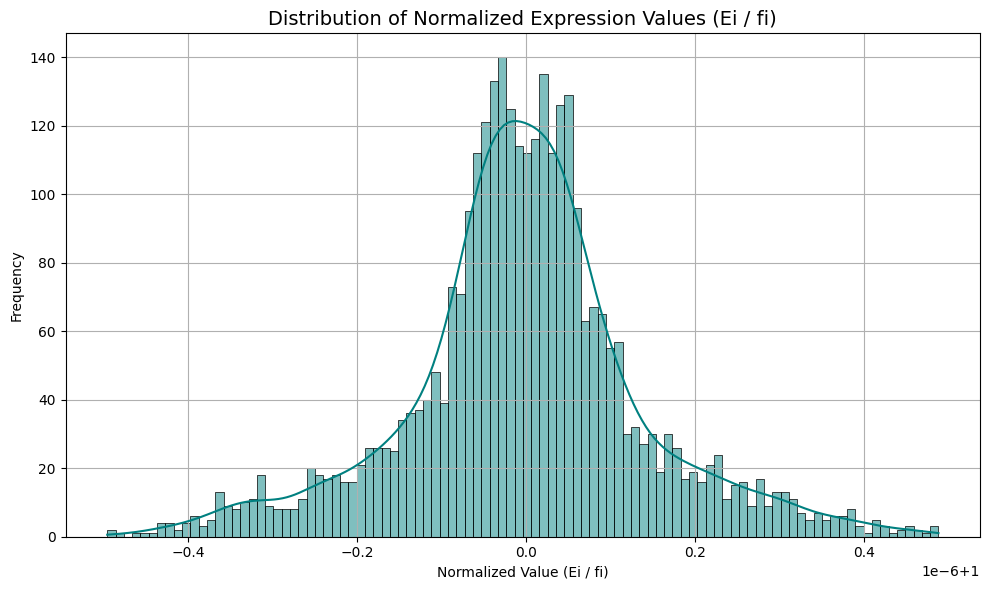

Minimum value in distribution: 0.9999995040225649
Maximum value in distribution: 1.000000488294626


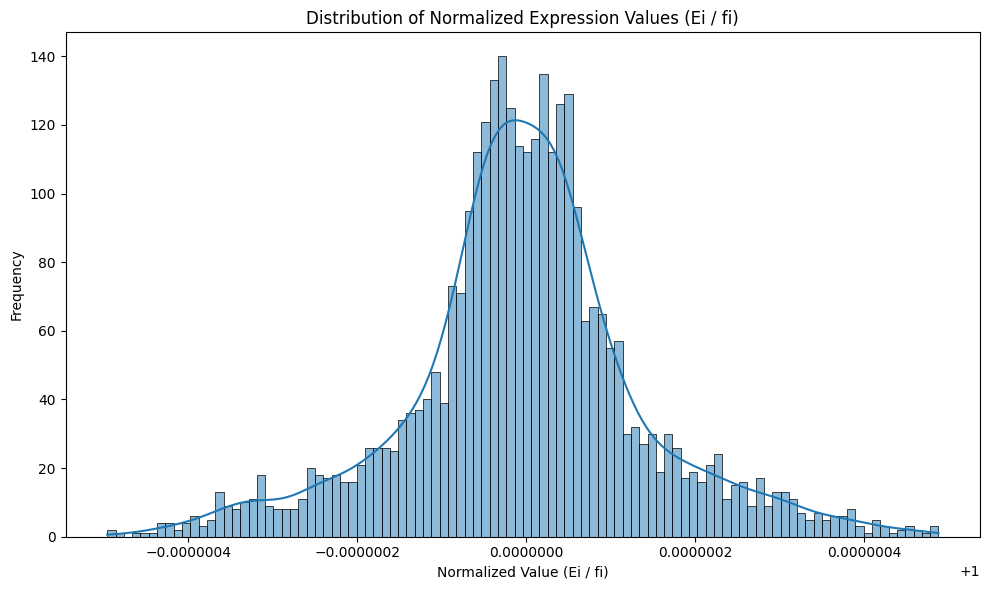

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

expression_df = pd.read_csv("HSC Data - SOLUTIONS (1).csv")
factors_df = pd.read_csv("normalization_factors (2).csv")


common_genes = expression_df.columns.intersection(factors_df.columns)
expression_df = expression_df[common_genes]
factors_df = factors_df[common_genes]

normalized_matrix = expression_df / factors_df

all_values = normalized_matrix.values.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(all_values, bins=100, kde=True, color='teal')
plt.title("Distribution of Normalized Expression Values (Ei / fi)", fontsize=14)
plt.xlabel("Normalized Value (Ei / fi)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

min_val = all_values.min()
max_val = all_values.max()

print(f"Minimum value in distribution: {min_val}")
print(f"Maximum value in distribution: {max_val}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(all_values, kde=True, bins=100)
plt.ticklabel_format(style='plain', axis='x')

plt.title("Distribution of Normalized Expression Values (Ei / fi)")
plt.xlabel("Normalized Value (Ei / fi)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd


expression_df = pd.read_csv("/content/HSC Data - SOLUTIONS.csv")
factors_df = pd.read_csv("/content/normalization_factors (2).csv")

print("Expression data preview:\n", expression_df.head())
print("\nNormalization factors preview:\n", factors_df.head())


Expression data preview:
        GATA2      GATA1         PU1       EKLF       Fli1        cJun  \
0   368.5908   32.63656    8.607356  218.18870   821.0189  130.012700   
1   468.2729   39.85395  274.415200   16.29717   641.8377  202.139800   
2  1117.6550   68.30379  248.774100   31.20249   619.1759  378.627800   
3  1617.0290  251.34280   38.991040  138.55740  1413.7510    8.156539   
4   862.2028   32.29023  129.464800  231.44650   185.2160   40.293690   

      EgrNab       Gfi1      CEBPa        SCL  ...       GFI1       IRF8  \
0   34.29838  26674.380   76.57793  1017.4250  ...  210.92960  299.52290   
1   99.18858  25616.760  237.59970  1311.7070  ...   96.19131   72.52629   
2   19.13279   4554.198   91.93457   123.2067  ...  211.90590  152.82770   
3  186.22700  21207.480   84.98510  2051.4230  ...   74.15425  120.45840   
4  263.49100   7606.415   34.91392  1796.1850  ...   60.83635  123.46960   

        TAL1        Elf1       LMO2       Ldb1       E2A      Meis1  \
0   15.

In [ ]:
print("Expression columns:", list(expression_df.columns))
print("Factor columns:", list(factors_df.columns))

# See which columns match
common_genes = expression_df.columns.intersection(factors_df.columns)
print("Common genes:", list(common_genes))


Expression columns: ['GATA2', 'GATA1', 'PU1', 'EKLF', 'Fli1', 'cJun', 'EgrNab', 'Gfi1', 'CEBPa', 'SCL', 'Bmp4', 'Notch1', 'VEGF', 'Hedgehog', 'Runx1', 'ATF3', 'IL6', 'IL12b', 'NF-kB', 'AP1', 'Csf1r', 'Pax5', 'GFI1', 'IRF8', 'TAL1', 'Elf1', 'LMO2', 'Ldb1', 'E2A', 'Meis1', 'Erg', 'Lyl1']
Factor columns: ['GATA2', 'GATA1', 'PU1', 'EKLF', 'Fli1', 'cJun', 'EgrNab', 'Gfi1', 'CEBPa', 'SCL', 'Bmp4', 'Notch1', 'VEGF', 'Hedgehog', 'Runx1', 'ATF3', 'IL6', 'IL12b', 'NF-kB', 'AP1', 'Csf1r', 'Pax5', 'GFI1', 'IRF8', 'TAL1', 'Elf1', 'LMO2', 'Ldb1', 'E2A', 'Meis1', 'Erg', 'Lyl1']
Common genes: ['GATA2', 'GATA1', 'PU1', 'EKLF', 'Fli1', 'cJun', 'EgrNab', 'Gfi1', 'CEBPa', 'SCL', 'Bmp4', 'Notch1', 'VEGF', 'Hedgehog', 'Runx1', 'ATF3', 'IL6', 'IL12b', 'NF-kB', 'AP1', 'Csf1r', 'Pax5', 'GFI1', 'IRF8', 'TAL1', 'Elf1', 'LMO2', 'Ldb1', 'E2A', 'Meis1', 'Erg', 'Lyl1']


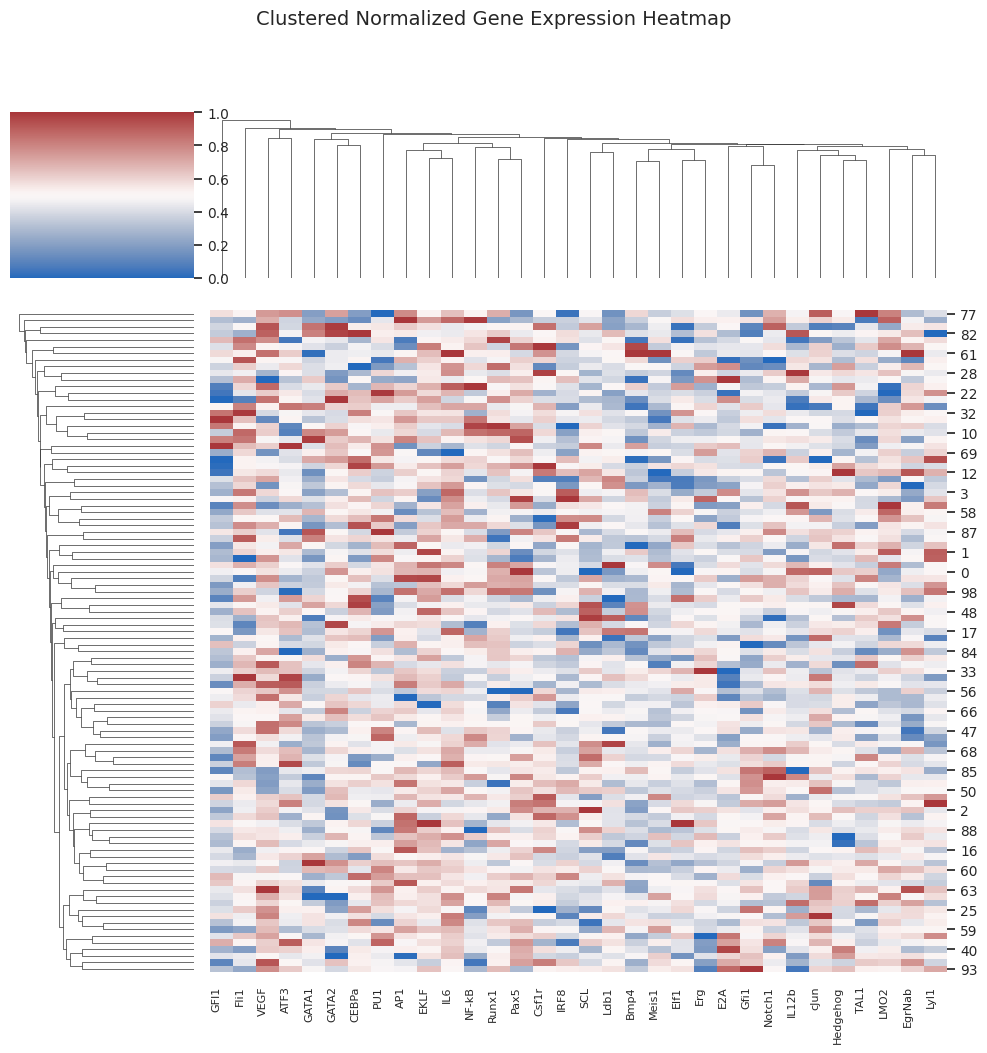

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/normalized_expressionlala (1).csv")

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns='Unnamed: 0')

sns.set(font_scale=0.9)

g = sns.clustermap(
   df,
        cmap="vlag",
        standard_scale=1,
        row_cluster=True,
        col_cluster=True,  # No dendrograms (not pos!)
        cbar_pos=(0.02, 0.8, 0.05, 0.18)

)

plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, ha='right', fontsize=8)

]
g.fig.suptitle("Clustered Normalized Gene Expression Heatmap", fontsize=14, y=1.05)

plt.tight_layout()
plt.show()




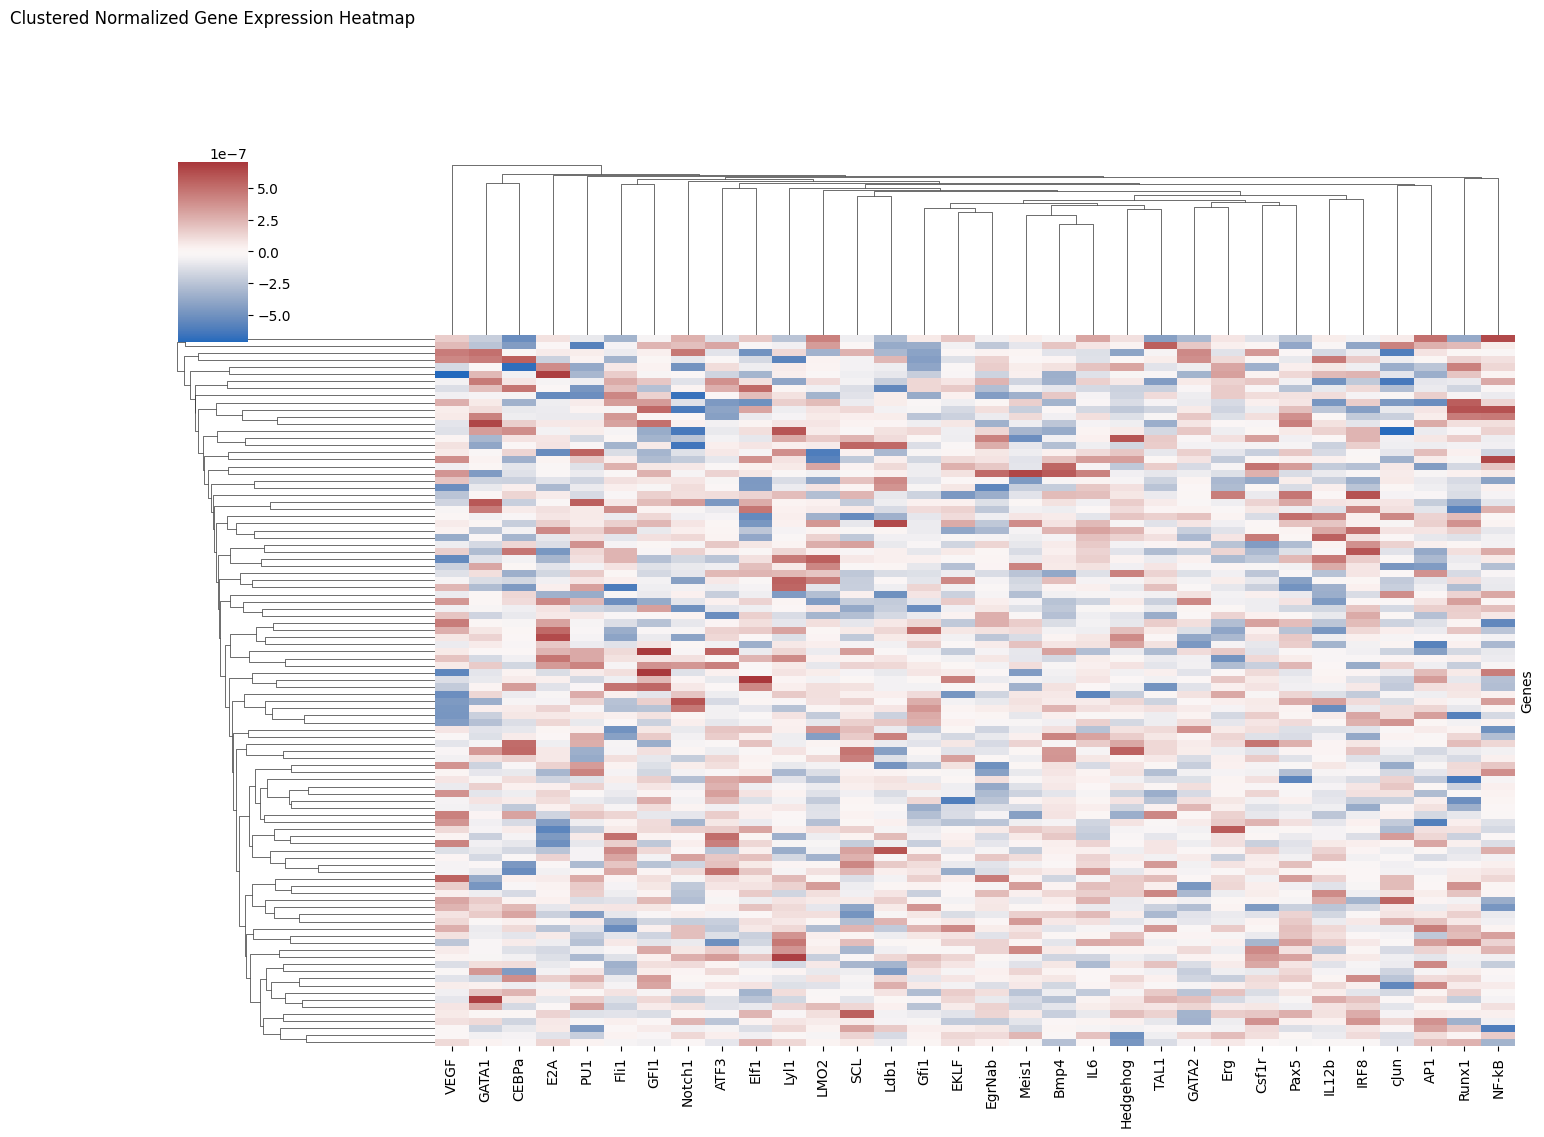

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.clustermap(
    df,
    cmap="vlag",         # red white and blue lol
    figsize=(14, 10),    # adjust
    row_cluster=True,    # cluster rows (samples)
    col_cluster=True,    # cluster columns (genes)
    xticklabels=True,    # show gene names
    yticklabels=False
)

plt.title("Clustered Normalized Gene Expression Heatmap", pad=100)
plt.show()


In [ ]:
import pandas as pd

# g/k normalized values
df = pd.read_csv("/content/normalized_expressionlala (1).csv", index_col=0)

# Binarize: ON (1) if value >= 1, else OFF (0)
binary_df = (df >= 1).astype(int)
binary_df.to_csv("binarized_expression.csv")


In [ ]:
import pandas as pd

# Load the full expression matrix (make sure the first column is not being treated as data)
df = pd.read_csv("/content/normalized_expressionlala.csv", index_col=0)

print(f"Shape: {df.shape}")
print(df.head())


Shape: (100, 32)
              GATA2         GATA1           PU1          EKLF          Fli1  \
Genes                                                                         
1      1.950000e-07 -5.790000e-08  5.880000e-08  1.090000e-07 -8.240000e-08   
2     -5.300000e-08 -1.400000e-07  7.310000e-08  4.050000e-07  4.230000e-08   
3     -3.320000e-07  2.530000e-09 -1.230000e-07 -1.130000e-07 -1.120000e-07   
4     -2.030000e-07 -2.420000e-07  1.490000e-07 -3.980000e-07  3.080000e-07   
5      4.330000e-08 -1.610000e-07  3.670000e-07 -1.760000e-07 -4.990000e-08   

               cJun        EgrNab          Gfi1         CEBPa           SCL  \
Genes                                                                         
1      4.060000e-07 -6.860000e-08 -1.020000e-07 -2.920000e-08 -5.330000e-07   
2     -2.250000e-07 -4.930000e-08 -1.090000e-07 -1.690000e-07 -2.110000e-07   
3     -4.920000e-08  1.300000e-07 -8.270000e-08 -5.340000e-09  5.560000e-07   
4      8.080000e-08 -3.060000e-07 

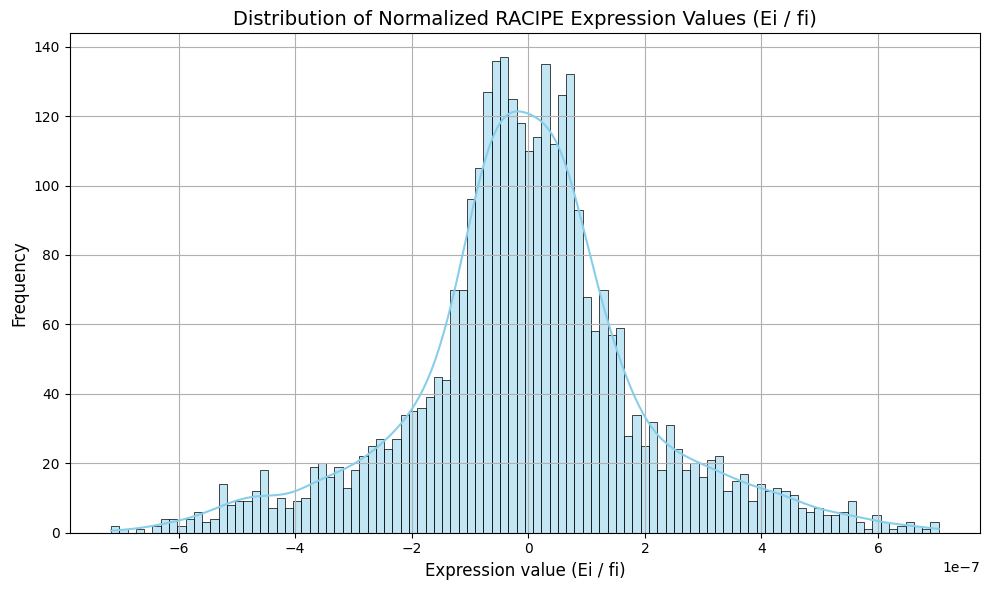

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

expression_df = pd.read_csv("normalized_expressionlala.csv", index_col=0)

all_values = expression_df.values.flatten()

plt.figure(figsize=(10, 6))
sns.histplot(all_values, bins=100, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Normalized RACIPE Expression Values (Ei / fi)", fontsize=14)
plt.xlabel("Expression value (Ei / fi)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.savefig("expression_distribution.png", dpi=300)

plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv("/content/normalized_expressionlala.csv", index_col=0)

binarized_df = (df >= 0).astype(int)
print("Binarized RACIPE expression matrix (preview):")
print(binarized_df.head())

binarized_df.to_csv("binarized_expression.csv")
print("\nBinarized data saved to 'binarized_expression.csv'")


Binarized RACIPE expression matrix (preview):
       GATA2  GATA1  PU1  EKLF  Fli1  cJun  EgrNab  Gfi1  CEBPa  SCL  ...  \
Genes                                                                 ...   
1          1      0    1     1     0     1       0     0      0    0  ...   
2          0      0    1     1     1     0       0     0      0    0  ...   
3          0      1    0     0     0     0       1     0      0    1  ...   
4          0      0    1     0     1     1       0     0      0    0  ...   
5          1      0    1     0     0     1       1     0      1    1  ...   

       GFI1  IRF8  TAL1  Elf1  LMO2  Ldb1  E2A  Meis1  Erg  Lyl1  
Genes                                                             
1         1     1     1     0     0     0    1      1    1     1  
2         0     0     1     0     1     0    0      0    1     1  
3         0     1     1     1     1     0    1      1    1     0  
4         0     1     1     0     1     1    1      0    0     0  
5         0 